In [6]:
import torch
from functions.train_test import train, test, train_kd
from models.vit import ViT
from models.ViT_CNN import ViT_CNN
from functions.helpers import count_parameters
from functions.plotter import plot_feature_maps, plot_loss_accuracy
from functions.data_loader import (
    get_data_loader,
    load_checkpoint,
    load_lists_from_file,
    get_random_image,
)


In [7]:
torch.manual_seed(42)

CIFAR-100

In [ ]:
train_loader, test_loader = get_data_loader(
    80, 2, "datasets/cifar-100/cifar-100-python", download=True
)

In [ ]:
base_model = ViT(
    image_size=32,
    patch_size=4,
    num_classes=100,
    dim=64,
    depth=4,
    heads=8,
    mlp_dim=256,
    dropout=0.1,
).to("cpu") #cpu for feature visualisation
base_model_load_path = f"save_model/cifar-100/vit_base/best_model.pt"
print(f"Total parameters:{count_parameters(base_model)}")

In [8]:
ViT_CNN_model = ViT_CNN(
    image_size=32,
    patch_size=4,
    num_classes=100,
    dim=64,
    depth=2,
    heads=4,
    mlp_dim=256,
    dropout=0.1,
).to("cuda")#cpu for feature visualisation
ViT_CNN_model_save_path = "save_model/cifar-100/ViT_CNN"
ViT_CNN_model_load_path = f"{ViT_CNN_model_save_path}/best_model.pt"
print(f"Total parameters:{count_parameters(ViT_CNN_model)}")

Total parameters:246404


In [ ]:
load_checkpoint(ViT_CNN_model,ViT_CNN_model_load_path)
test(ViT_CNN_model,test_loader,'cuda')

Epoch 1/300, Loss: 4.011783456802368
Current Learning Rate: 0.000999972584682756
accuracy: 16.25%
Test Accuracy: 13.87%
max_test_accuracy : 13.87
Epoch 2/300, Loss: 3.4374374225616453
Current Learning Rate: 0.0009998903417374227
accuracy: 17.5%
Test Accuracy: 20.98%
max_test_accuracy : 20.98
Epoch 3/300, Loss: 3.102863262939453
Current Learning Rate: 0.0009997532801828658
accuracy: 22.5%
Test Accuracy: 26.09%
max_test_accuracy : 26.09
Epoch 4/300, Loss: 2.854745042037964
Current Learning Rate: 0.0009995614150494292
accuracy: 33.75%
Test Accuracy: 30.05%
max_test_accuracy : 30.05
Epoch 5/300, Loss: 2.680457996749878
Current Learning Rate: 0.000999314767377287
accuracy: 32.5%
Test Accuracy: 32.61%
max_test_accuracy : 32.61
Epoch 6/300, Loss: 2.5424874073028563
Current Learning Rate: 0.0009990133642141358
accuracy: 36.25%
Test Accuracy: 36.27%
max_test_accuracy : 36.27
Epoch 7/300, Loss: 2.43621612033844
Current Learning Rate: 0.000998657238612229
accuracy: 32.5%
Test Accuracy: 37.38%
max

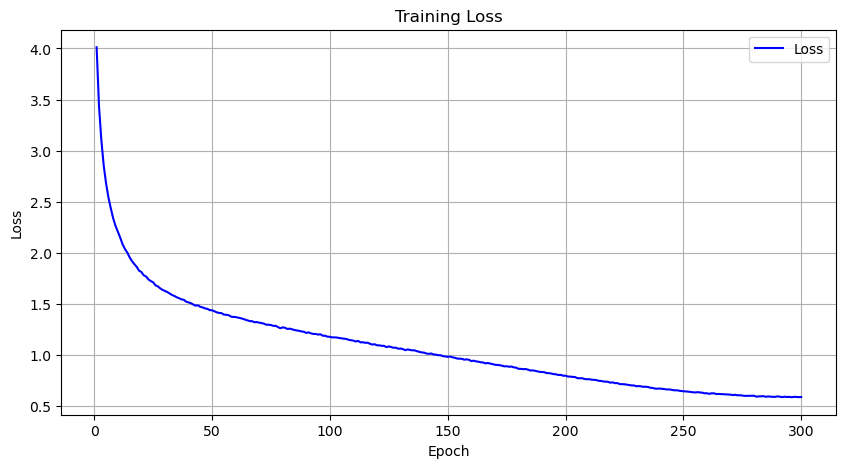

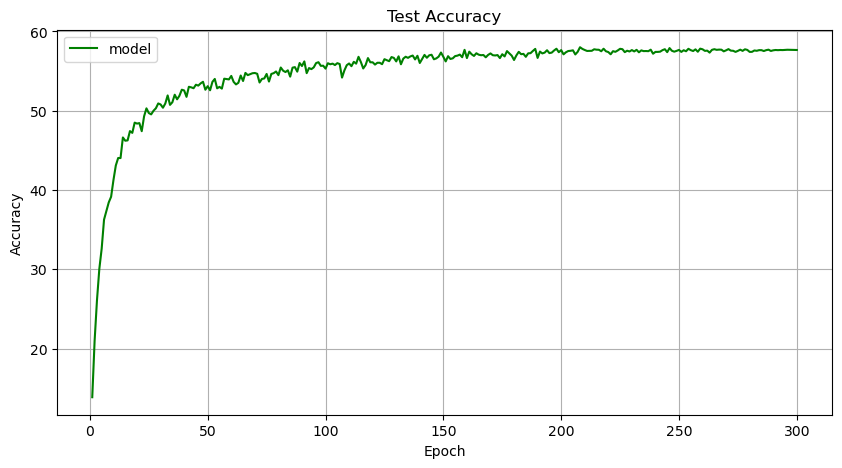

In [9]:
train(
    ViT_CNN_model,
    train_loader,
    test_loader,
    epochs=300,
    learning_rate=0.001,
    device="cuda",
    weight_decay=0.0005,
    # save_path=ViT_CNN_model_save_path,
)

In [ ]:
print(f"Total parameters:{count_parameters(ViT_CNN_model)}")

In [ ]:
x,img=get_random_image('bee')

In [ ]:
# train(
#     base_model,
#     train_loader,
#     test_loader,
#     epochs=100,
#     learning_rate=0.001,
#     device="cuda",
#     weight_decay=0.0005,
#     save_path=base_model_save_path,
# )

In [ ]:
load_checkpoint(base_model,base_model_load_path)
test(base_model,test_loader,device="cpu")

In [ ]:
plot_feature_maps(base_model,x,img,device='cpu')

In [ ]:
# train(
#     CNNFF_model,
#     train_loader,
#     test_loader,
#     epochs=100,
#     learning_rate=0.001,
#     device="cuda",
#     weight_decay=0.0005,
#     save_path=CNNFF_model_save_path,
# )

In [ ]:
load_checkpoint(ViT_CNN_model,ViT_CNN_model_load_path)
test(ViT_CNN_model,test_loader,device='cpu')

In [ ]:
plot_feature_maps(base_model,x,img)

CIFAR-10

In [ ]:
train_loader, test_loader = get_data_loader(
    80, 2, "datasets/cifar-10/cifar-10-python", download=True
)

In [ ]:
base_model = ViT(
    image_size=32,
    patch_size=4,
    num_classes=100,
    dim=64,
    depth=4,
    heads=8,
    mlp_dim=256,
    dropout=0.1,
).to("cpu") #cpu for feature visualisation
base_model_load_path = f"save_model/cifar-10/vit_base/best_model.pt"
print(f"Total parameters:{count_parameters(base_model)}")

In [ ]:
ViT_CNN_model = ViT_CNN(
    image_size=32,
    patch_size=4,
    num_classes=100,
    dim=64,
    depth=2,
    heads=4,
    mlp_dim=256,
    dropout=0.1,
).to("cuda")#cpu for feature visualisation
ViT_CNN_model_save_path = "save_model/cifar-10/CNN_ViT2"
CNNFF_model_load_path = f"{ViT_CNN_model_save_path}/best_model.pt"
print(f"Total parameters:{count_parameters(ViT_CNN_model)}")

In [ ]:
train(
    ViT_CNN_model,
    train_loader,
    test_loader,
    epochs=300,
    learning_rate=0.001,
    device="cuda",
    weight_decay=0.0005,
    save_path=ViT_CNN_model_save_path,
)